<a href="https://colab.research.google.com/github/misqualzarabi/DS-Unit-4-Sprint-1-NLP/blob/main/NLP_sprint_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [47]:
!python -m spacy download en_core_web_lg 

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [48]:
import pandas as pd

yelp = pd.read_json('review_sample.json', lines=True)

In [49]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [50]:
yelp.shape

(10000, 9)

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [51]:
import re

In [52]:
cleaning = ['text']

def regex_clean(dataframe, target_list):
    
    for target in target_list:
        dataframe[target].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
        dataframe[target].apply(lambda x: re.sub(r'/n', '', x))
                        
import spacy
nlp = spacy.load('en_core_web_lg')
  
custom_stops = ['<', '>', '\n', '"', '\\', '|', '</div>', '<ul>', '<li>', '<p>', 'li', 'ul', 'p', ']' , '\>', '\n\n']

def tokenize(text): #lemmatize actually
    doc = nlp(text)
    lemmas = []
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON')):
            valid = True
            
            for stop in custom_stops:
                    if stop in token.text:
                        valid = False
                        break
        else:
            valid = False
                
        if valid == True:   
            lemmas.append(token.lemma_)
            
    return lemmas

In [53]:
#tokenize reviews
regex_clean(yelp, cleaning)
yelp['lemmas'] = yelp['text'].apply(tokenize)

In [54]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,lemmas
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, Lo..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, Togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Vegas, dozen, time, foot, Circus, Circus, , ..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, good, actually, guy..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3.5, 4, star, bad, $, 12.99, lunch, senior, 1..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [55]:
#I'll rejoin the lemmas so that TFIDF can read them

#de-tokenize
detokenized_doc = []
for i in range(len(yelp['lemmas'])):
    t = ' '.join(yelp['lemmas'][i])
    detokenized_doc.append(t)
    
yelp['lemma_text'] = detokenized_doc

In [56]:
# save df since this took a lot of time to lemmatize
yelp.to_csv('yelp_lemmas.csv', sep='\t', encoding='utf-8', index=False)

In [57]:
# I will tfidf vectorize then apply nn
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(yelp['lemma_text'])

In [58]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

# Fit NN on TF-IDF Vectors in dtm
nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [59]:
fake_review = """This was the worst dining experience of my life. 
The cook literally took a dump on a plate and rolled it in a bun. 
That's not food. It's not right. It was a nightmare"""

fake_dtm = tfidf.transform([fake_review])

closeness, location = nn.kneighbors(fake_dtm.todense())

In [60]:
# print out similar reviews
import numpy as np

for (x,y), value in np.ndenumerate(location):
    print(yelp['text'].loc[value])
    print('\n')

天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來


Devin from Aptive Environmental went above and beyond! He got into every nook & cranny spraying for those pesky scorpions!!


旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。
質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 
ネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。
予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。
また是非マッサージなどで伺いたいと思います。


One of the best dining experiences. More than just food and service. This place does it all right!


if could leave a 0 star i would i was on hold for 2 hours and there system just hung up on me everytime i call i can never get anyone on the phone WORST COMPANY EVER!!!!!!!!!!!


My friend took me to this place to try the buns. 

When we came, there was a grand opening special of 20% discount. I bought the original bun (that has cream cheese inside) and a matcha puff. 

Matcha puff had lots of filling, but it tasted more like cream cheese than matcha. 

Th

In [61]:
# notes, this seems to be word matching, the word bun is being picked up, but the sentiment is missing
# The last review captures the nightmare vocab word
# on the whole, I think that the style of writing is being matched, rather than the sentiment behind the writing. Actually, the chinese review is quite similar
# in its style to the fake review, so this matching is structural rather than sentimental

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [62]:

yelp.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id', 'lemmas', 'lemma_text'],
      dtype='object')

In [63]:
from sklearn.model_selection import train_test_split

X = yelp['lemma_text']
y = yelp['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
 #try pipeline with SGD
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

vect = tfidf
clf = SGDClassifier(max_iter=5)

# lsi = Pipeline([('vect', vect), ('svd', svd)])

pipe = Pipeline([('vect', vect), ('clf', clf)])

In [65]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=5000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', l

In [66]:
pipe.score(X_test,y_test)

0.589

In [67]:

# use Randomized search cv to optimize
from sklearn.model_selection import RandomizedSearchCV
params = {
    'vect__max_df' : (.5, .7, 1),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'clf__loss' : ('hinge', 'modified_huber'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
}

rsCV = RandomizedSearchCV(estimator=pipe, param_distributions=params, 
                          cv=5, n_jobs=-1, random_state=42, verbose=1)

In [68]:
rsCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('vect',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=5000,
                                                              min_df=1,
                                                        

In [69]:
rsCV.score(X_test, y_test)

0.5235

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [70]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

In [71]:

# Gensim imports
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

Learn the vocubalary of the yelp data:

In [72]:
yelp.columns.tolist()

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id',
 'lemmas',
 'lemma_text']

In [73]:
# create A Dictionary Representation of all the words in our corpus of reviews
reviews2word = corpora.Dictionary(yelp['lemmas'])

In [74]:

#remove extreme values from the dataset
reviews2word.filter_extremes(no_below=10, no_above=0.75)

In [75]:
id2word = ...

Create a bag of words representation of the entire corpus

In [76]:
corpus = ...

In [77]:
# now we create our corpus upon which we will apply the lda
reviews_corpus = [reviews2word.doc2bow(text) for text in yelp['lemmas']]
reviews_corpus

[[(0, 4),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 3),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 3),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1)],
 [(0, 2),
  (1, 2),
  (9, 1),
  (16, 1),
  (26, 1),
  (34, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 3),
  (69, 2),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 5),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1)]

Your LDA model should be ready for estimation: 

In [78]:
# find most coherent number of topics
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = path
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=reviews2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=reviews2word, 
                                                        corpus=reviews_corpus, 
                                                        path=yelp['lemmas'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=4)

Create 1-2 visualizations of the results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'best1'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


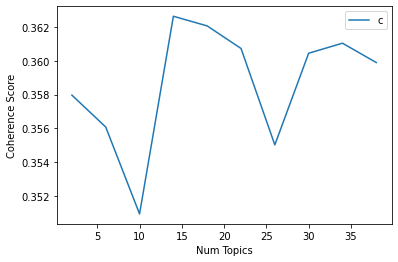

In [79]:
import matplotlib.pyplot as plt

#graph of coherence
limit = 40; start = 2; step = 4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(("coherence_values"), loc='best1')
plt.show();

In [80]:
# this shows me that the ideal number of topics should be ~ 34
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.358
Num Topics = 6  has Coherence Value of 0.3561
Num Topics = 10  has Coherence Value of 0.3509
Num Topics = 14  has Coherence Value of 0.3626
Num Topics = 18  has Coherence Value of 0.3621
Num Topics = 22  has Coherence Value of 0.3607
Num Topics = 26  has Coherence Value of 0.355
Num Topics = 30  has Coherence Value of 0.3604
Num Topics = 34  has Coherence Value of 0.361
Num Topics = 38  has Coherence Value of 0.3599


In [81]:
# latent dirchelle model with 34 topics
lda = LdaMulticore(corpus=reviews_corpus,
                   id2word=reviews2word,
                   random_state=42,
                   num_topics = 34,
                   passes=10,
                   workers=4
                  )

In [82]:
# pretty print visualization of topics
# lda.print_topics()
words = [re.findall(r'"([^"]*)"', t[1]) for t in lda.print_topics()]
topics = [' '.join(t) for t in words]
(topics)

['roll sushi good order come try restaurant ramen food fish',
 'good chicken order food dish menu fry sauce eat taste',
 '  food good great service come time love restaurant get',
 'go good buy tire get great time work find year',
 'nail good try salon coffee time love amazing gel great',
 'food love order time great good go try come large',
 'buffet   dog good $ clean food nice foot recommend',
 'great recommend come service nice highly time food go dinner',
 'service great food customer excellent good time location love store',
 'hair good great look cut go donut time get service',
 'ice cream   flavor great good cookie chocolate kid fun',
 'feel time go massage skin dog get week work  ',
 'great good food drink bar Vegas staff burger service time',
 '  know customer say review new car go business service',
 'good food de chicken dish curry restaurant la et thai',
 'food beer good amazing order love sauce server go restaurant',
 'time day go get tell service call come say take',
 'ro

Some observations
Initially the lemmatizing function did not filter out '\n' and this resulted in a lot more empty spaces being treated as vectors, this affected the topic coherence (suggesting a 10 topic LDA would be optimal) and when using pyLDAvis, those topics were less connected and less interpretable.

When I used custom stop words to filter out my lemmas, I arrivfed at 34 topics for maximum coherence and the results are much more understandable.

Some of my favorites:

topics 17, 28, 10
17 has to do with japanese and chinese food, 10 is about lunch, and 15 involves donuts, and blueberries

What do they all have in common?

New York City!

1
Is the largest and has to do with cars and mcdonalds - god bless America.

2
Has to do with waiting and complaining, and it overlaps with Las Vegas!

Usefulness of results
I'm not sure that these results are useful as of yet, I'm going to try passing my topics back into our yelp dataframe to see if they can be used to improve our star guessing model. I think that named entity recognition will also enhanced results because I'm seeing names like 'Al' and 'Eric' showing up in tpics

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Create more visualizations of the LDA results and provide written analysis
* Incorporate RandomizedSearchCV into docoument classification pipeline
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)